In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
import os

# Append the parent directory to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [17]:
# Import from DB:

from dotenv import load_dotenv

from research.trades_db_utils import create_connection

load_dotenv()
DB_HOSTNAME = os.getenv('DB_HOSTNAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')

conn = create_connection(DB_HOSTNAME, 'CoinTrades', DB_USER, DB_PASSWORD)

cursor = conn.cursor()

coins_select_query = f"""
    select *
    from CoinTrades.coins
"""

cursor.execute(select_query)

row = cursor.fetchall()

coins_df = pd.DataFrame(row, columns=['id', 'mint_address', 'creator_address', 'mint_date', 'coin_name', 'coin_symbol'])
coins_df.sort_values(by='mint_date', ascending=False, inplace=True)
coins_df.head(5)

trades_select_query = f"""
    select *
    from CoinTrades.trades
"""

cursor.execute(trades_select_query)

row = cursor.fetchall()

trades_df = pd.DataFrame(row, columns=['id', 'coin_id', 'signature', 'sol_amount', 'token_amount', 'is_buy', 'user', 'timestamp'])
trades_df.sort_values(by='id', ascending=True, inplace=True)
trades_df.head(5)

conn.close()

trades_df.head(5)

,id,coin_id,signature,sol_amount,token_amount,is_buy,user,timestamp
0,1,2,4dNQijynMuyPC5zJp9PhRwhfdTbC2Xg9DKWQqZzw84TKpY...,3.9736,125235294117647.00,0,7BxLNAkHxZPL7XbuYmKLnd8kLNcDN4NL6ikh5XwoPzL5,1740259058
1,2,1,4G1YCfuVRruwNgmX3HHVDekkQ2wFaijpeepkBPnyvLSQAy...,0.0268,958349364665.00,0,Epx1HkcjsEzFim6B2aMgaxRJtNWaEZtLTZC7iXryCkH2,1740258981
2,3,3,buUnWTAEy7vPzZf6zGfV1ZbuA2X3KAtJyysbV4RSp6gRQx...,0.0209,746328752128.00,0,14UvX6hczd5m76XQyzMs9FxDy8xuwB2NTUC53tdvi5uN,1740258704
3,4,2,vyuPrc481rUTTk3MBDmYDd6ojaPF6zCHeRL5D8GUEdBqbK...,0.0163,453225734739.00,0,BsPf1mkTKL9bFTgmhrjEdtLCF2Txeyt2xZyHERhz4T5T,1740258596
4,5,1,65WVjNnnDkbkmRyiidcF4v1znwX1N3rtenWJ3Amsk2L9kU...,0.0419,1494509631565.00,0,Fhx1iXduhqzDMvf9Q7QvxrL5XT7oHPMc35p2ptpTwHBf,1740258785


In [14]:
coins_df.head(5)

,id,mint_address,creator_address,mint_date,coin_name,coin_symbol
223,224,CGPsxLm61fS83H24fNPj7ETWh7LbVenpYsQC8STRpump,8q8wBm8Eq4Dxp7SAkvPxXSK2omTXcMex2WHsEBa1RzkR,1740258898502,YE SWASTIKA,YESTIKA
222,223,CEhtCTsxSjK4f1j3KqjBgS76fwBZHkFDQz6hWqppump,CDKWW92tiA4s2viAfHt6mULrP1vFQx4z1r8cTZnoUKJT,1740258895926,Kendrick Pepe,KENPE
221,222,FNTds8QCy5f5kdDhZDKXzy8urvPp2VmXrN3yYx7apump,GLWvgXx5BFGougNHBLBif74YDSfKx5QqLJZzYZVLAXam,1740258892300,Cecr AI,CECR
219,220,A9noaRcC9yQMZ7jGBwWT9wRw2two55Rmou2nzsazpump,CkbmC4qUpj9PsuZkGvchZ1VrFB5tcgwkhiqBCdBk1sy5,1740258891287,Baby Penguin,Pixel
220,221,GkCF2LSqPYyoQ25pnzMu5sgB1G6mjdNTAR47wDPUpump,DwzgxRX8UHyyqc42iojktW6sE91Leu2uFk9KVZ8vLhAa,1740258889629,22 Febuary,22/2/2025


In [2]:
# import coin.csv and trades.csv as dataframes

coins = pd.read_csv('coins.csv')
trades = pd.read_csv('trades.csv')

In [3]:
# display the first 5 rows of each dataframe
print("Coins:")
print(coins.head())
print("Trades:")
print(trades.head())

Coins:
   id                                  mint_address   
0   1  EoNbQxXJUASBVLeEia6JnXU8AgSPKaR9povAoj3qpump  \
1   2  EMbtSixYWoKLFsP1LosxcqWXfhHTVdQNusuGqadbpump   
2   3  DwekdjSWaDL6VSXVMCtiav6tva6vN7NQvZtxFHu7bi8A   
3   4  5RV5VphAKzFhg93gMDaJBj8oK9TSMtQXHvqoteZkpump   
4   5  Ghbjqu97ZGzxyHmx1XqwR1s2AeDAkWQ6U6w3P96Xpump   

                                creator_address      mint_date   
0  AVsRdizrKsZ3MP5y7bW9Yihr7aBvF4zu4s8s9Ltqm4fu  1740258477722  \
1  7BxLNAkHxZPL7XbuYmKLnd8kLNcDN4NL6ikh5XwoPzL5  1740258477695   
2  D3sovmjANgA8V27e5rnQft8kV3mocSH8gw9zwth3Ba9g  1740258476618   
3  5p6kbFzL1yM7G8rWvEEFK5NWaL7KnatrLnDBEjgHxpwW  1740258475778   
4  By73VG4zPiQt7WTX8AjWur9uuEN3TtmvmqR4UtcVsGSf  1740258474579   

                       coin_name coin_symbol  
0  Where we all started gambling    CSGOWILD  
1                     SPICY BUTT         SPB  
2             first on a bycycle   FISHCYCLE  
3                         mtndao     MTNMTN3  
4                     Bera Cha

To check if buy as soon as possible and sell right after the creator of the coin sells it, we can check how the prices changes after the creator sells it.

The price can be defined as the following:
$$Price = \frac{Sol Amount}{Tocken Amount}$$

In [4]:
# for each coin_id in trades, find the creator_address in coins (coin_id in coins is called id), and create a new column called creator_id in trades
trades = trades.merge(coins[['id', 'creator_address']], left_on='coin_id', right_on='id', how='left')
#trades = trades.drop(columns=['id'])
# add another column to trades that is 1 if the creator_address is the same as the signature and is_buy == 0, and 0 otherwise
trades['is_creator_sell'] = (trades['creator_address'] == trades['user']) & (trades['is_buy'] == 0)

We will only be looking at the coins that the creator has sold it. And the following are the coins we can be looking at:

In [5]:
# in trades find all rows with is_creator_sell == 1
creator_sells = trades[trades['is_creator_sell'] == 1]
#print(creator_sells)
# find all the coin_id appeared in creator_sells
coin_ids = creator_sells['coin_id'].unique()
print(coin_ids)
# calculate the price in trades
trades['price'] = trades['sol_amount'] / trades['token_amount']


[ 2  3  1  4  6 11 10  9 13 14 16 15 18 17 20 21 22 24 27 29 28 30 31 32
 37 36 39 41 42 44 45 47 49]


Now we plot the price of the coins overtime, with a red vertical line indicates the time when the creator sold it:

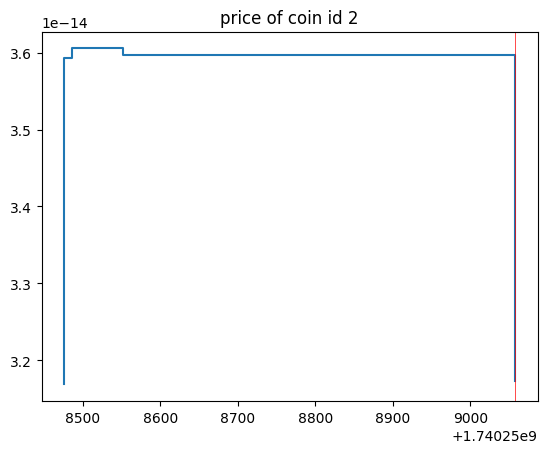

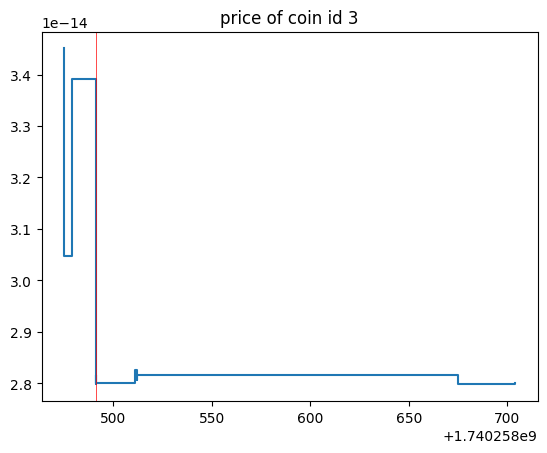

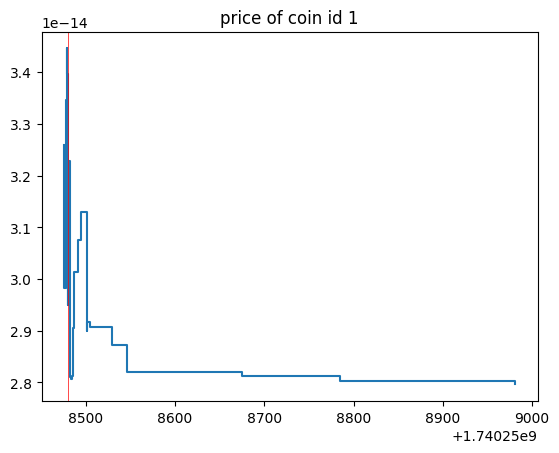

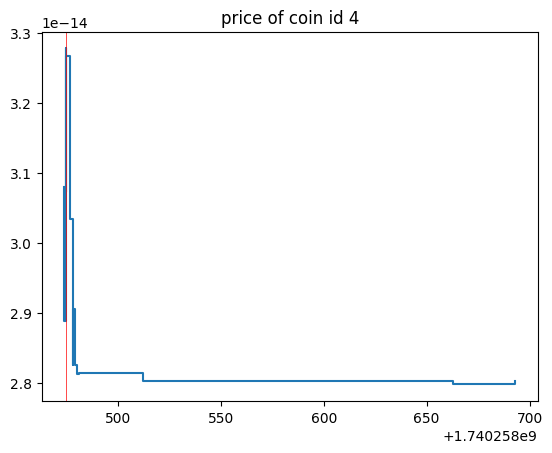

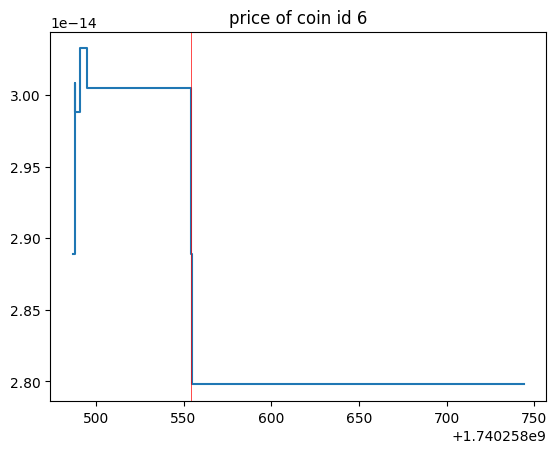

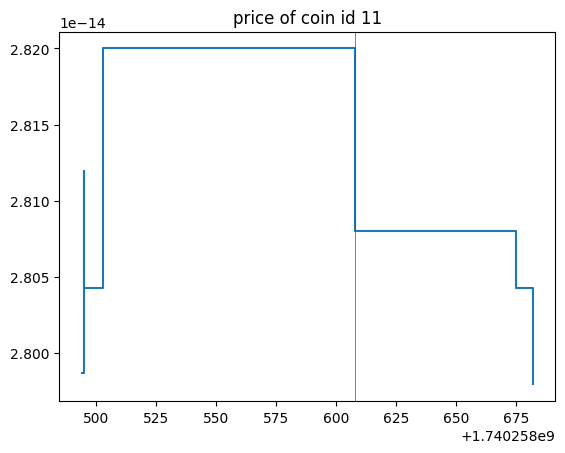

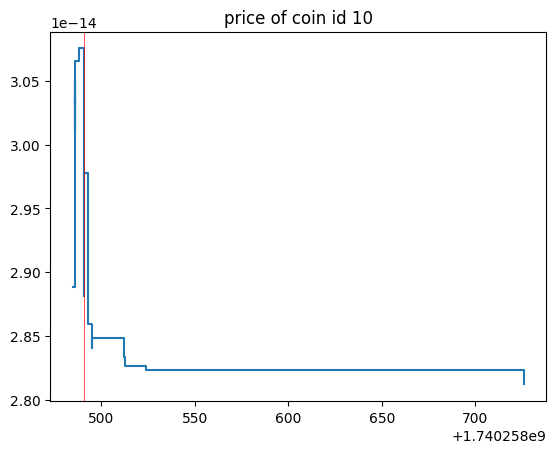

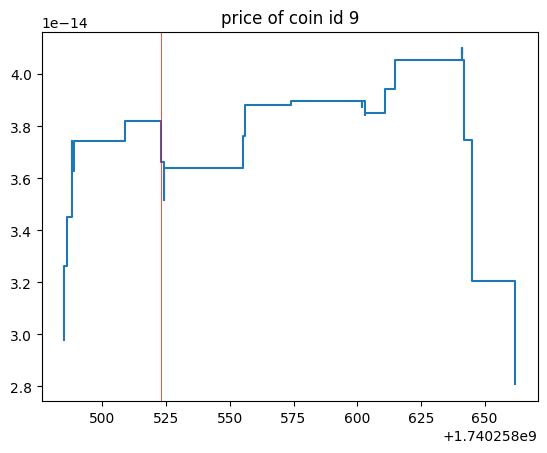

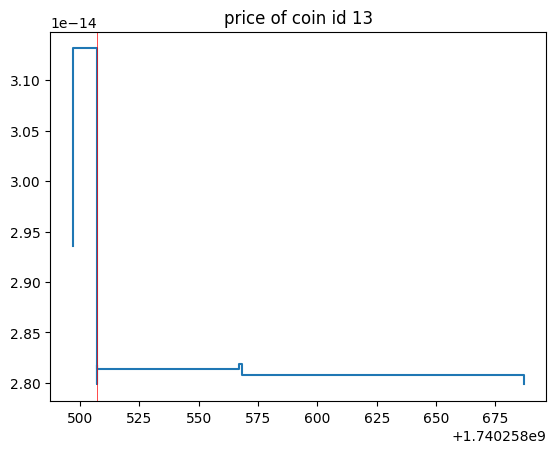

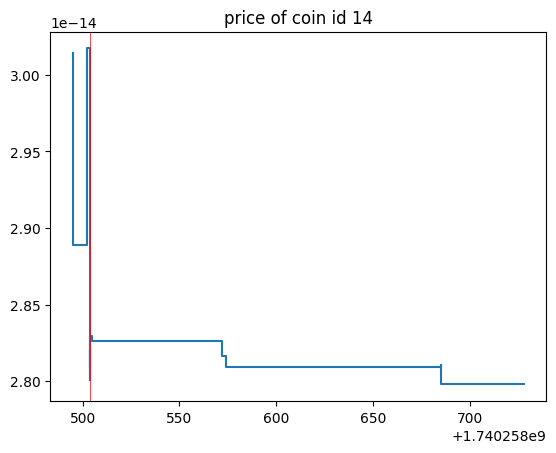

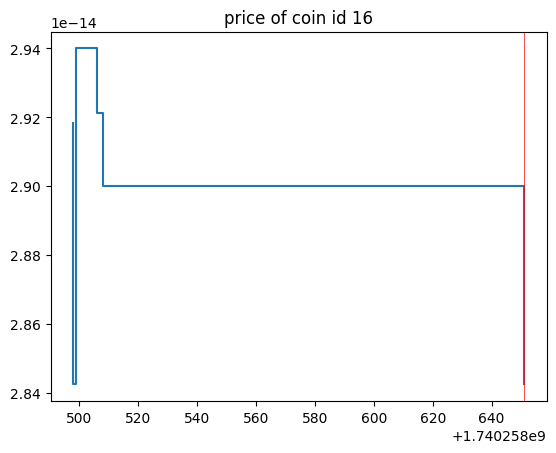

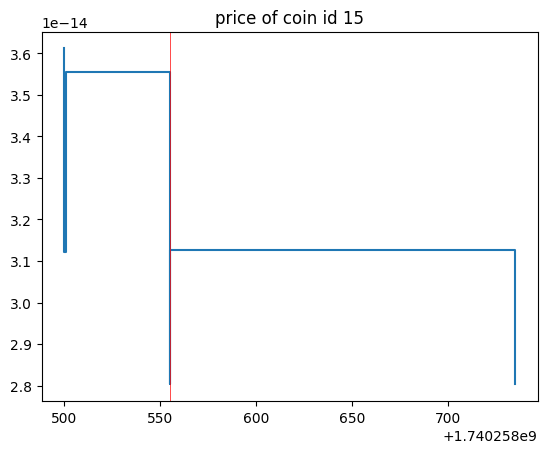

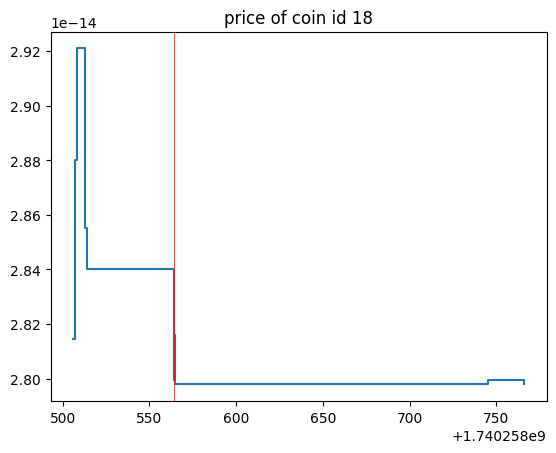

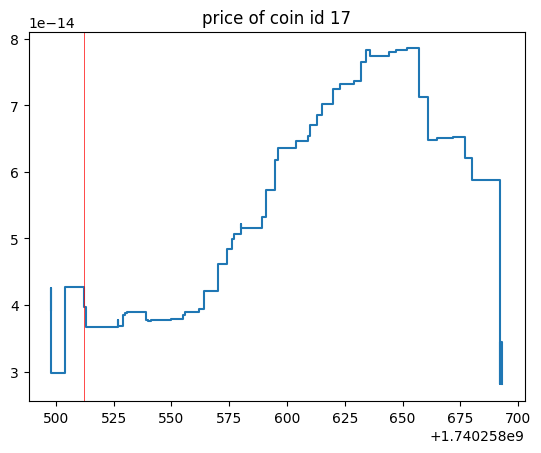

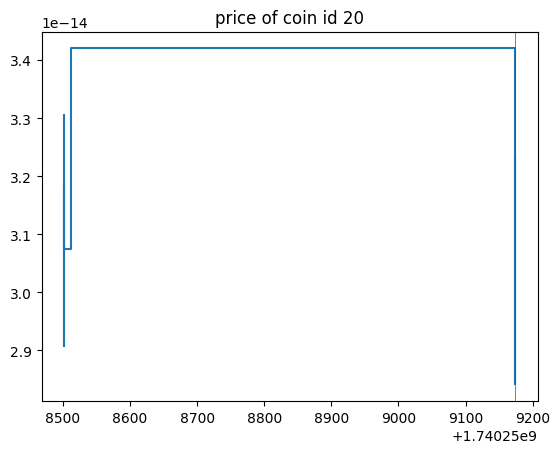

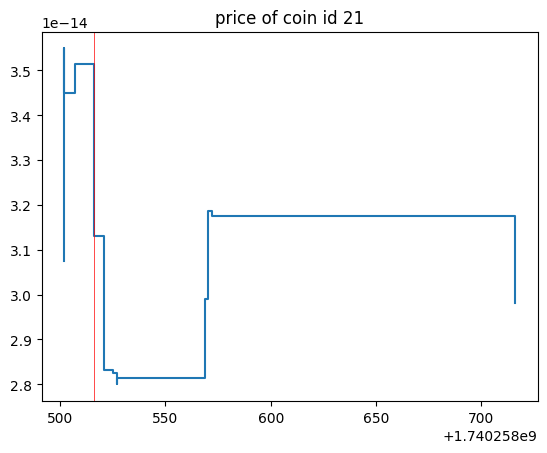

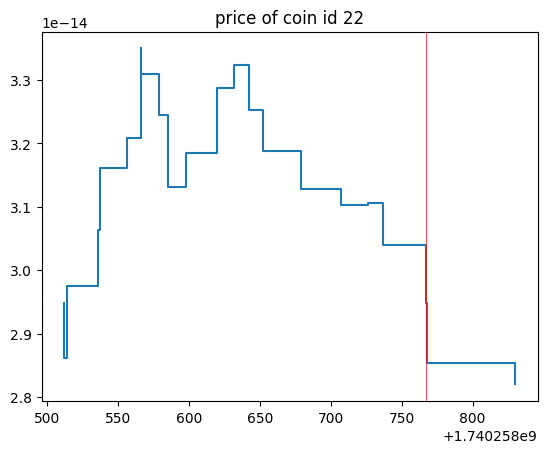

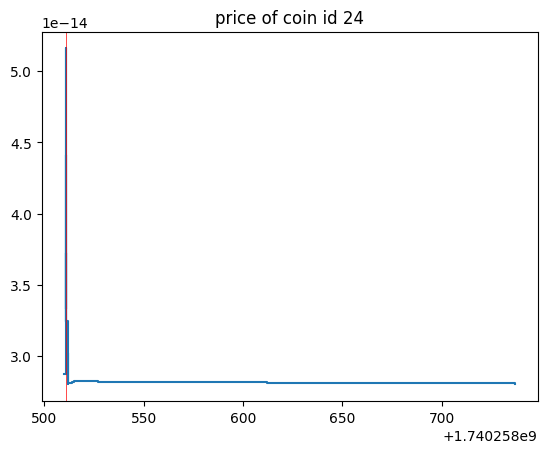

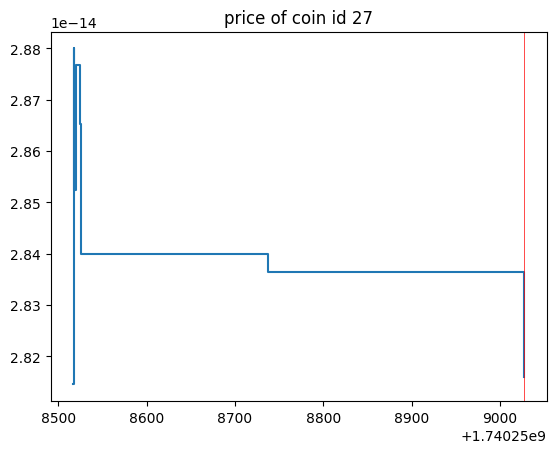

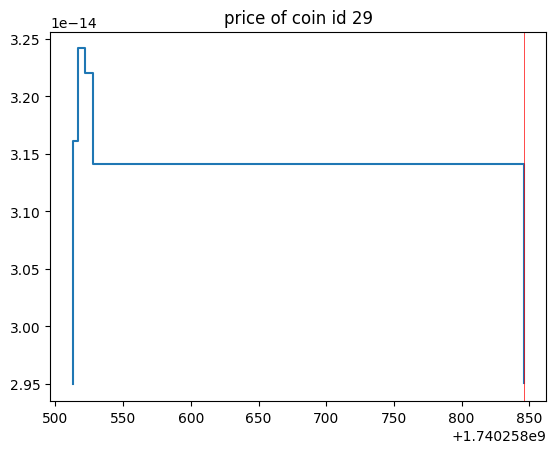

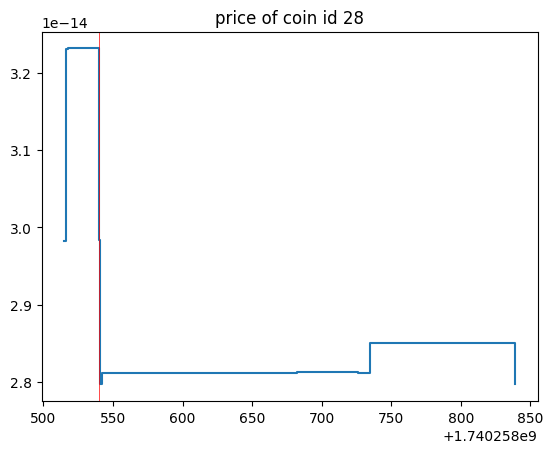

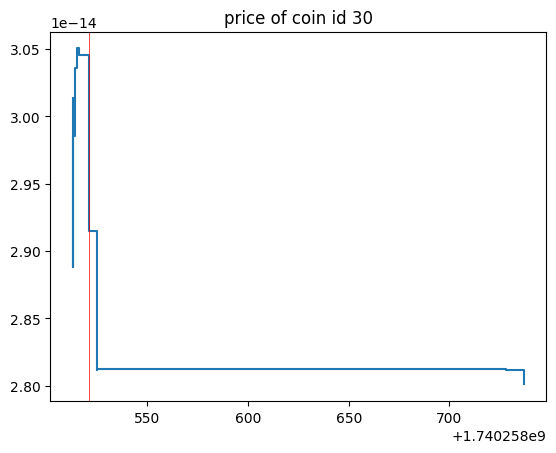

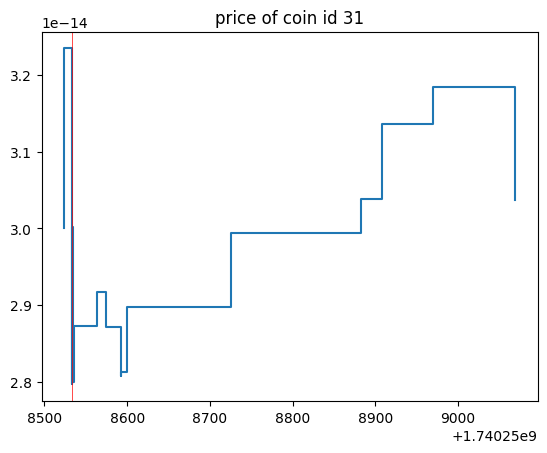

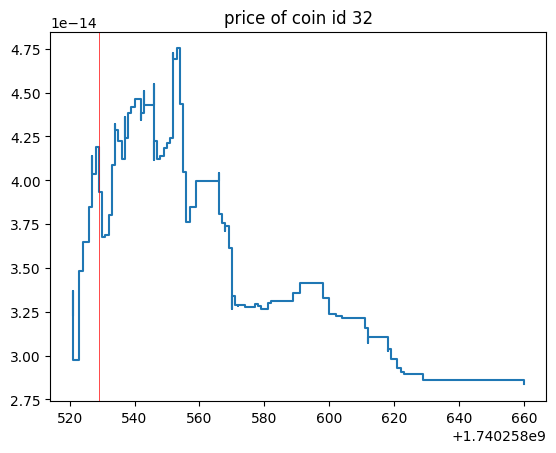

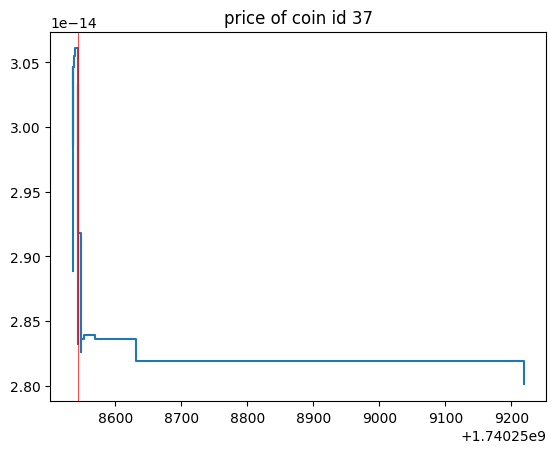

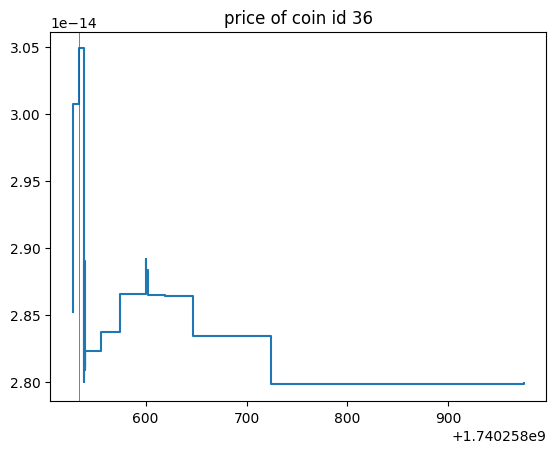

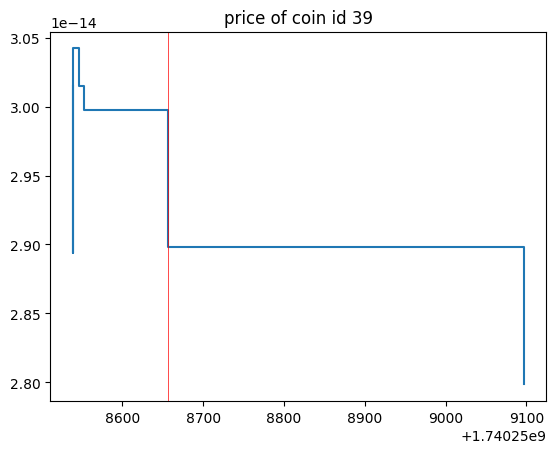

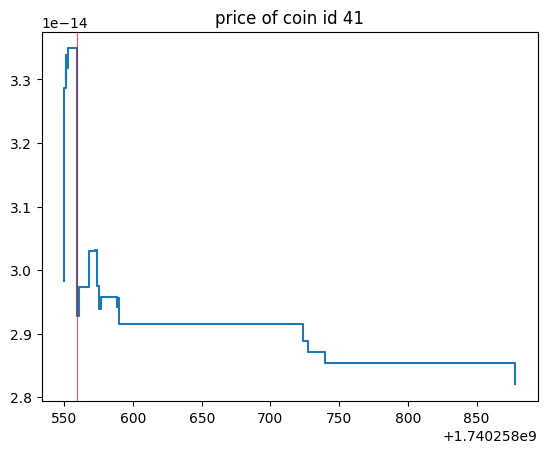

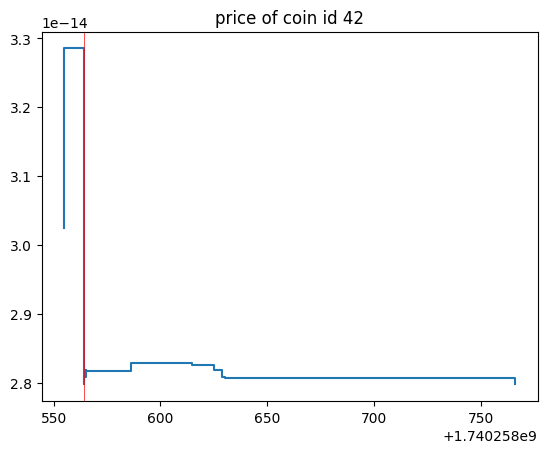

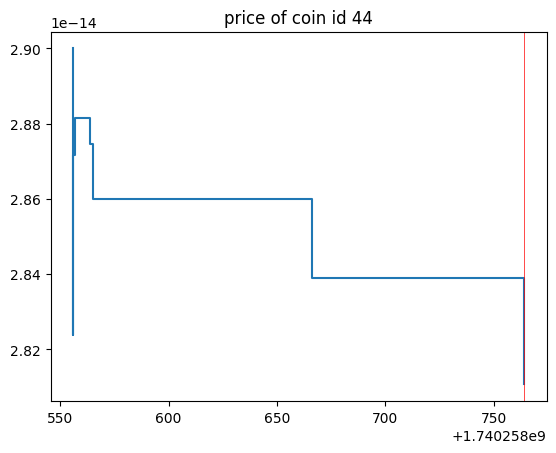

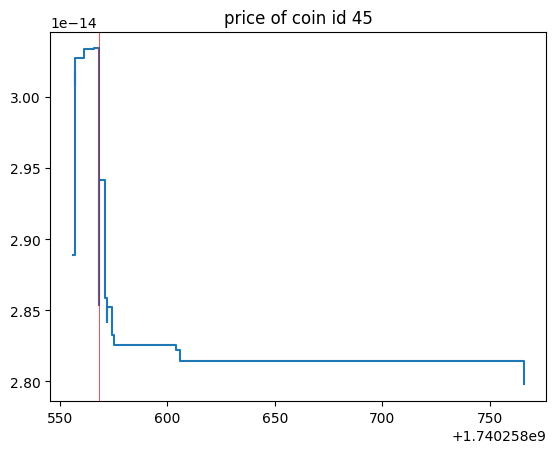

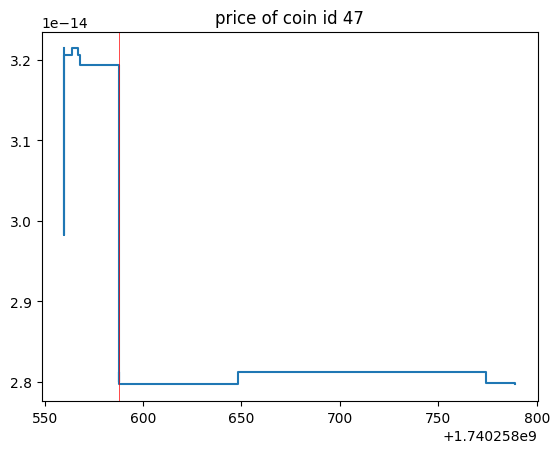

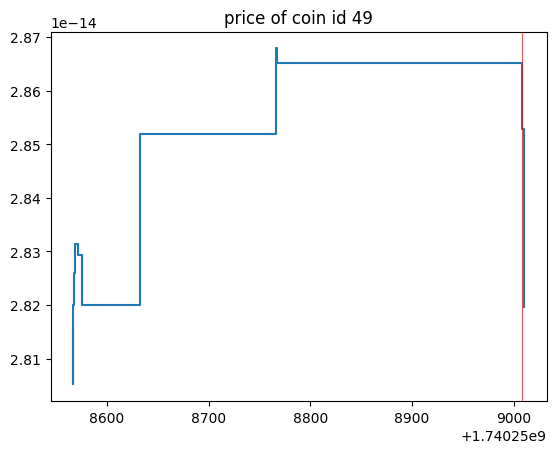

In [6]:
# in sperate plots, plot the price of coin_id for all coin_id in coin_ids, inlcuding the creator sell as vertical lines
for coin_id in coin_ids:
    coin = trades[trades['coin_id'] == coin_id]
    creator_sell = coin[coin['is_creator_sell'] == 1]
    plt.step(coin['timestamp'], coin['price'])
    plt.axvline(x=creator_sell['timestamp'].values[0], color='r', linewidth=0.5)
    plt.title('price of coin id ' + str(coin_id))
    plt.show()


We can see that with only a few exceptions, the prices dropped dramatically after the creator sold it. But is it a good strategy? We calculate the return in the following way:
$$\text{Strategy return} = \frac{\text{Price right after the creator sold} - \text{Starting price}}{\text{Starting price}}$$

In [7]:
# for each coin_id in coin_ids, find the first price and the next price after the creator sell
# create a dataframe with columns coin_id, first_price, next_price
buy_and_sell = pd.DataFrame(columns=['coin_id', 'first_price', 'next_price'])
for coin_id in coin_ids:
    coin = trades[trades['coin_id'] == coin_id]
    # reset index
    coin = coin.reset_index()
    creator_sell = coin[coin['is_creator_sell'] == 1]
    #print(creator_sell)
    creator_sell_index = creator_sell.index[0]
    #print(creator_sell_index)
    #print(coin['price'])
    first_price = coin['price'][0]
    next_price = coin['price'].iloc[creator_sell_index + 1]
    buy_and_sell.loc[len(buy_and_sell)] = [coin_id, first_price, next_price]

# calculate the percentage return
buy_and_sell['return'] = (buy_and_sell['next_price'] - buy_and_sell['first_price']) / buy_and_sell['first_price']
#print(buy_and_sell.head())
# print the average return
print("The average return is: ", buy_and_sell['return'].mean())

The average return is:  0.10865584083556434


The result is rather impressive, the it gives us a 10 percent return on average by simply following the strategy of buy right at the time when the coin is created and sell right after the main creator sells it. Now let's see the distribution of the return:

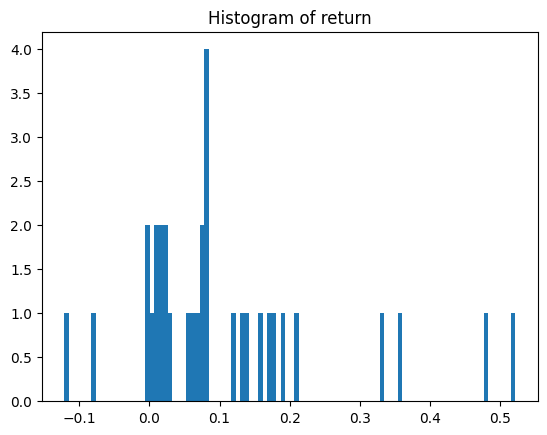

In [8]:
# plot the histogram of the return
plt.hist(buy_and_sell['return'], bins=100)
plt.title('Histogram of return')
plt.show()

The result from the histogram is reassuring. We can see that for most of the coin the return is positive but below 10 percent.

Let's explore some of the outliers: those who have a negative return and those have a return close to 50 percent. (To be updated)

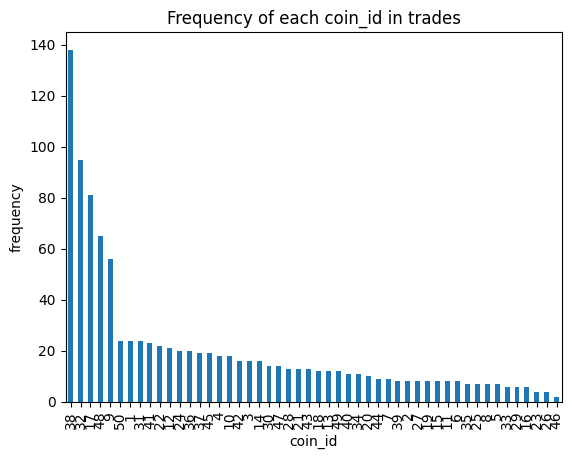

In [9]:
# plot the frequency of each coin_id in trades
coin_freq = trades['coin_id'].value_counts()
coin_freq.plot(kind='bar')
plt.xlabel('coin_id')
plt.ylabel('frequency')
plt.title('Frequency of each coin_id in trades')
plt.show()